<a href="https://colab.research.google.com/github/rafael-ferraz/MVP_Sprint2/blob/main/MVP_An%C3%A1lise_de_Dados_e_Boas_Pr%C3%A1ticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP - Análise de Dados e Boas Práticas
Base: Heart Disease\
Aluno: Rafael Ferraz de Queiroz


## Definição do Problema

Para este projeto foi utilizado o dataset de Doença Cardíaca (Heart Disease) do repositório <a href='https://archive.ics.uci.edu'>*UC Irvine Machine Learning Repository*</a>.

Neste dataset existem 4 databases: *Cleveland, Hungary, Switzerland e VA Long Beach*. Por recomendação dos criadores do repositório, escolhi o database de *Cleverland* por ser um dos únicos utilizados por pesquisadores de machine learning para treinamento. Além disso, optei pela versão "processada" dos dados, pois na época da consulta do repositório a versão não-processada do mesmo apresentava dados corrompidos. Este fato foi devidamente alertado pelos criadores do projeto e disponibilizado junto com os databases para download conforme citação abaixo.

> "<i>The file cleveland.data has been unfortunately messed up when we lost
> node cip2 and loaded the file on node ics.  The file processed.cleveland.data
> seems to be in good shape and is useable (for the 14 attributes situation).
> I'll clean up cleveland.data as soon as possible.
>
> Bad news: my original copy of the database appears to be corrupted.
> I'll have to go back to the donor to get a new copy."</i>
>
> -- <cite>David Aha</cite>

O objetivo do dataset é prever se um paciente possui ou não doença cardíaca (estreitamento de artéria coronária maior que 50%). O dataset utilizado é do tipo supervisionado, pois sabemos a saída esperada para cada entrada de dado. Possui um total de 14 atributos, sendo estes resultados de exames médicos e um atributo **num** como **atributo-alvo**, cujo valor vai de 0 (ausência de doença) até 4, ou seja, consideraremos os valores de 1 à 4 como indicador de presença de doença cardíaca.

\
Para mais informações, consulte a página do repositório em:  https://archive.ics.uci.edu/dataset/45/heart+disease

# Atributos

Id | Nome | Descrição | Valores Possíveis
---|------|-----------|------------------
1  |age|Idade do paciente|-
2  |sex|Sexo do paciente|0 = feminino; 1 = masculino
3  |cp|Dor no peito|1 = angina típica; 2 = angina atípica; 3 = dor não anginosa; 4 = assintomático
4  |trestbps|Pressão sanguínea em repouso (mm Hg)|-
5  |chol|Colesterol Cérico (mg/dl)|-
6  |fbs|Açúcar no sangue em jejum maior que 120 mg/dl|1 = Verdadeiro; 0 = Falso
7  |restecg|Resultados eletrocardiográficos em repouso|0 = Normal; 1 = Tendo anormalidade na onda ST-T;<br /> 2 = Mostrando hipertrofia ventricular esquerda provável ou definitiva
8  |thalach|Frequência cardíaca máxima alcançada|-
9  |exang|Angina induzida por exercício|1 = Sim; 0 = Não
10 |oldpeak|Depressão do segmento ST induzida por exercício em relação ao repouso|-
11 |slope|Inclinação do pico do segmento ST do exercício|1 = Ascendente; 2 = Plana; 3 = Descendente
12 |ca|Número de vasos principais|0-3
13 |thal|-|3 = Normal; 6 = Defeito corrigido; 7 = Defeito reversível
14 |num|Diagnóstico de doença cardíaca|0 = Estreitamento do diâmetro menor que 50%; 1,2,3,4 = Estreitamento do diâmetro maior que 50%


Iremos começar importando as bibliotecas necessárias e realizando configurações para execução do projeto neste notebook

In [61]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings

# Configuração para ignorar os alertas (warnings)
warnings.filterwarnings("ignore")

##Carga de Dados
Foi realizado o download do database "processed.cleveland.data" e disponibilizado o mesmo no repositório deste projeto no GitHub (https://github.com/rafael-ferraz/MVP_Sprint2) para que a versão se torne acessível em caso de mudança no repositório original do projeto.

Para carregar a dataset será utilizada a biblioteca Pandas do Python, informando manualmente o nome dos atributos, visto que o dataset não possui cabeçalho.

In [2]:
# Informa a URL do dataset
url_dataset = r'https://raw.githubusercontent.com/rafael-ferraz/MVP_Sprint2/main/processed.cleveland.data'

# Especifica o nome das colunas para o cabeçalho
colunas = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

# Realiza a leitura do arquivo, informando o nome das colunas
dataset = pd.read_csv(url_dataset, names=colunas, delimiter=",")

# Exibe uma prévia do dataset carregado
display(dataset)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


Analisando a visão acima, podemos notar que o dataset foi carregado de maneira correta, associando os valores do cabeçalho à suas respectivas colunas.

##Análise de Dados

Nesta etapa analisaremos algumas informações acerca da estrutura do dataset e dos dados como um todo, através de estatísticas descritivas e visualizações unimodais e multimodais.


###Estatística Descritiva

Nesta estapa vamos verificar a estrutura do dataset e os dados de forma geral, como o quantitativo de linhas, atributos e tipos dos dados. Iniciaremos visualizando as linhas iniciais do dataset.

In [3]:
# Comando para listar as primeiras linhas do dataset
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Podemos deduzir por essa amostragem que não há valores nulos, os nomes das colunas foram atribuídos corretamente aos atributos do dataset e os dados em todas as colunas são do tipo numéricos.

In [4]:
# Comando para listar as últimas 6 linhas do dataset
dataset.tail(6)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


Observando as últimas linhas do dataset, percebemos que a maioria dos campos continuam com os valores numéricos, com exceção do campo **ca** que apresenta um caractere de interrogação.

Podemos concluir assim que valores inesperados podem estar presentes em outras partes do dataset.

In [5]:
# Comando para exibir algumas estatísticas sobre os dados numéricos do dataset
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


Observando a saída do comando acima, notamos informações como total de linhas(count), média(mean), desvio padrão(std), valor mínimo(min), os valores dos dados nas posições de 25%, 50% e 75% e o valor máximo(max) para cada um dos atributos.

Podemos concluir que a contagem das linhas para os atributos são satisfatórias, assim como a média e desvião padrão com base na observação dos dados nas primeiras e últimas linhas do dataset.

Os valores nas posições 25%, 50% e 75% estão proporcionais à ordem crescente em que são apresentados. Os valores mínimos são proporcionais às demais estatísticas de cada atributo, com destaque a informação de valor máximo que aparenta certa desproporcionalidade no atributo **chol** em relação à média e valor mínimo.

Os atributos **ca** e **thal** foram omitidos das estatísticas numéricas deste comando, por apresentarem possíveis valores do tipo texto.

Abaixo será executado o comando para verificar o balanceamento entre as classes do dataset, que neste caso é representado pelo atributo **num**, onde iremos comparar a quantidade de ocorrências do valor 0(zero) com os demais (1, 2, 3 e 4).

In [6]:
# Verificação de balanceamento das classes
dataset.groupby('num').size()

num
0    164
1     55
2     36
3     35
4     13
dtype: int64

Podemos notar que a distribuição das classes encontra-se balanceada, visto que a ocorrência de valores "0" é de 164 registros e o somatório das ocorrências de "1" à "4" corresponde à 139 registros.

A seguir, executaremos o método para listar mais informações sobre o dataset, como a quantidade de linhas, atributos, tipos dos dados, quantidade de valores nulos, entre outros.

In [7]:
# Método para mostrar informações sobre o dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


Podemos perceber que nas informações listadas acima, o dataset possui um total de 303 linhas (incluíndo o cabeçalho), 14 colunas e nenhum valor nulo (303 *non-null* para todas as colunas).

Em relação aos tipos das colunas, foram identificados os tipos *float*, *object* e *int*. De acordo com a documentação da biblioteca Pandas, o tipo de dado *object* corresponde ao dado do tipo texto ou mixado (texto e número), reforçando que além da coluna **ca**, a coluna **thal** também possui algum dado do tipo texto.



###Visualizações

Nesta etapa iremos criar visões relacionadas ao dataset com o intuito de observar os graus de concentração, dispersão e identificar possíveis necessidades de transformação na etapa de processamento. Serão apresentadas visões *unimodais* (visões individuais para cada atributo) e *multimodais* (visões contemplando todo o dataset).

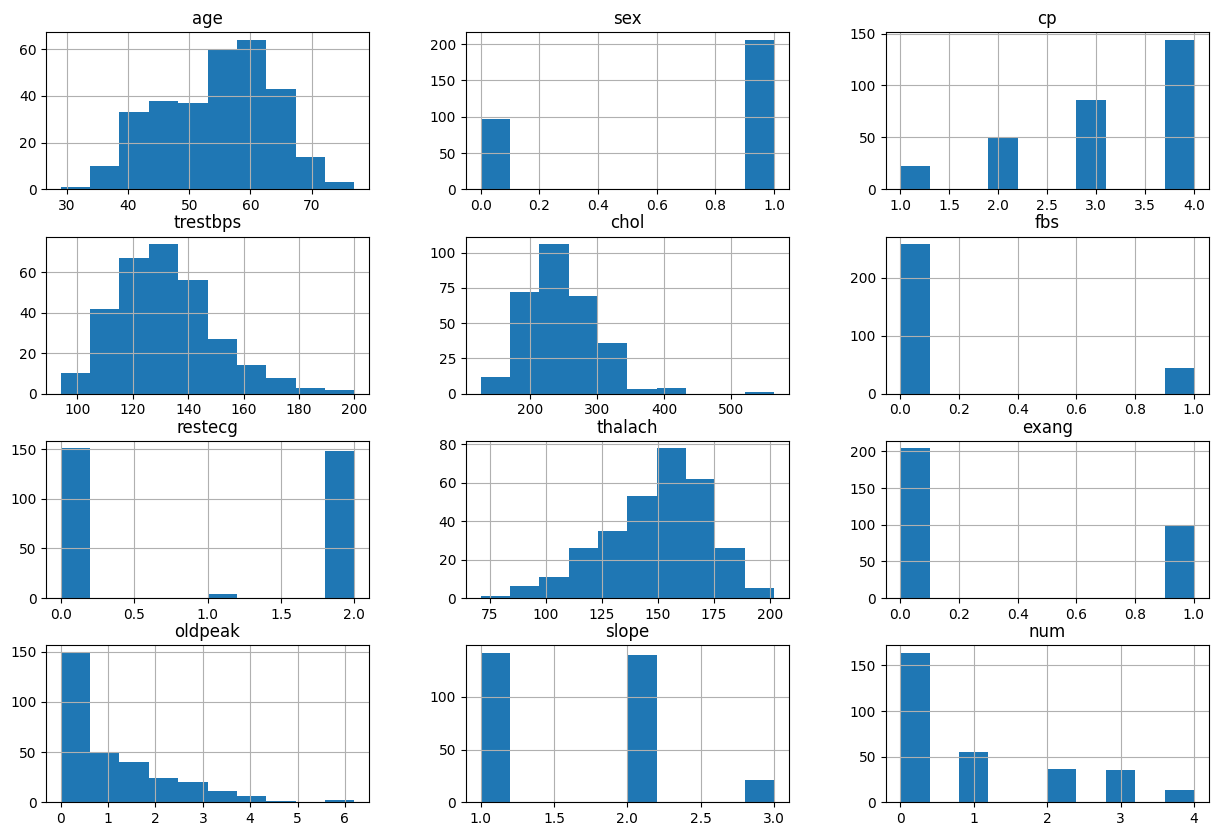

In [64]:
# Visão unimodal do tipo histograma
dataset.hist(figsize = (15,10))
plt.show()

Analisando as visões dos atributos sex, cp, fbs, exang, oldpeak, slope e num, estes seguem uma distribuição exponencial. Os demais seguem uma distribuição normal.

Os atributos *ca* e *thal* não foram exibidos, visto que o tipo dos mesmos não pode ser considerado numérico em sua totalidade.

Abaixo analisaremos as visões do tipo Density Plot, que é bastante similar ao histograma, porém é mais fácil de observar a distribuição dos dados no dataset.

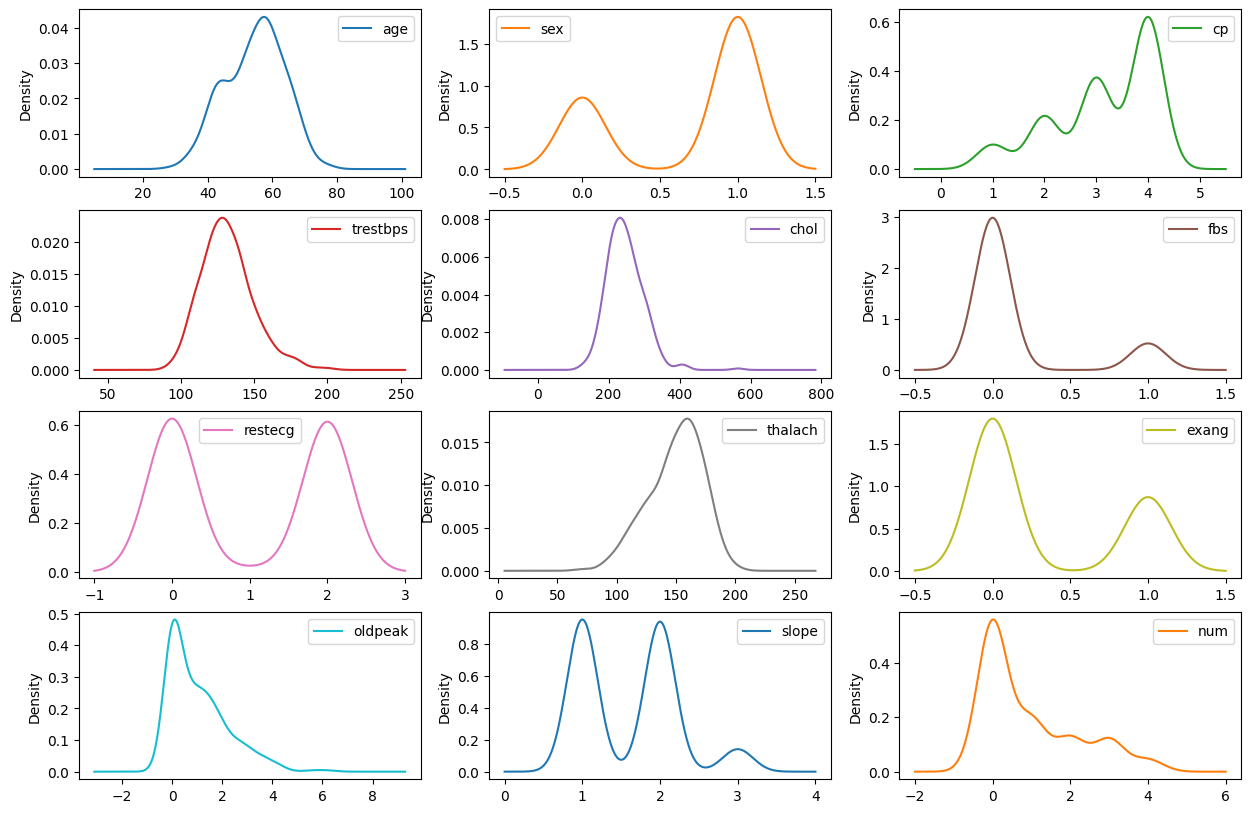

In [9]:
# # Visão unimodal do tipo Density Plot
dataset.plot(kind = 'density', subplots = True, layout = (4,3), sharex = False, figsize = (15,10))
plt.show()

Abaixo utilizaremos os gráficos de Boxplot, que permitem visualizar a distribuição dos dados e ter uma noção de assimetria e potenciais outliers.

Ele é composto por um retângulo(box) com uma linha central, cuja linha representa a mediana e segundo quartil(Q2), a linha base do retângulo representa o primeiro quartil(Q1) e a linha do topo do retângulo representa o terceiro quartil(Q3).

Fora do retângulo, existem linhas delimitadas representando os limites razoáveis dos dados (min e max) e os pequenos círculos fora desses delimitadores representam possíveis outliers.



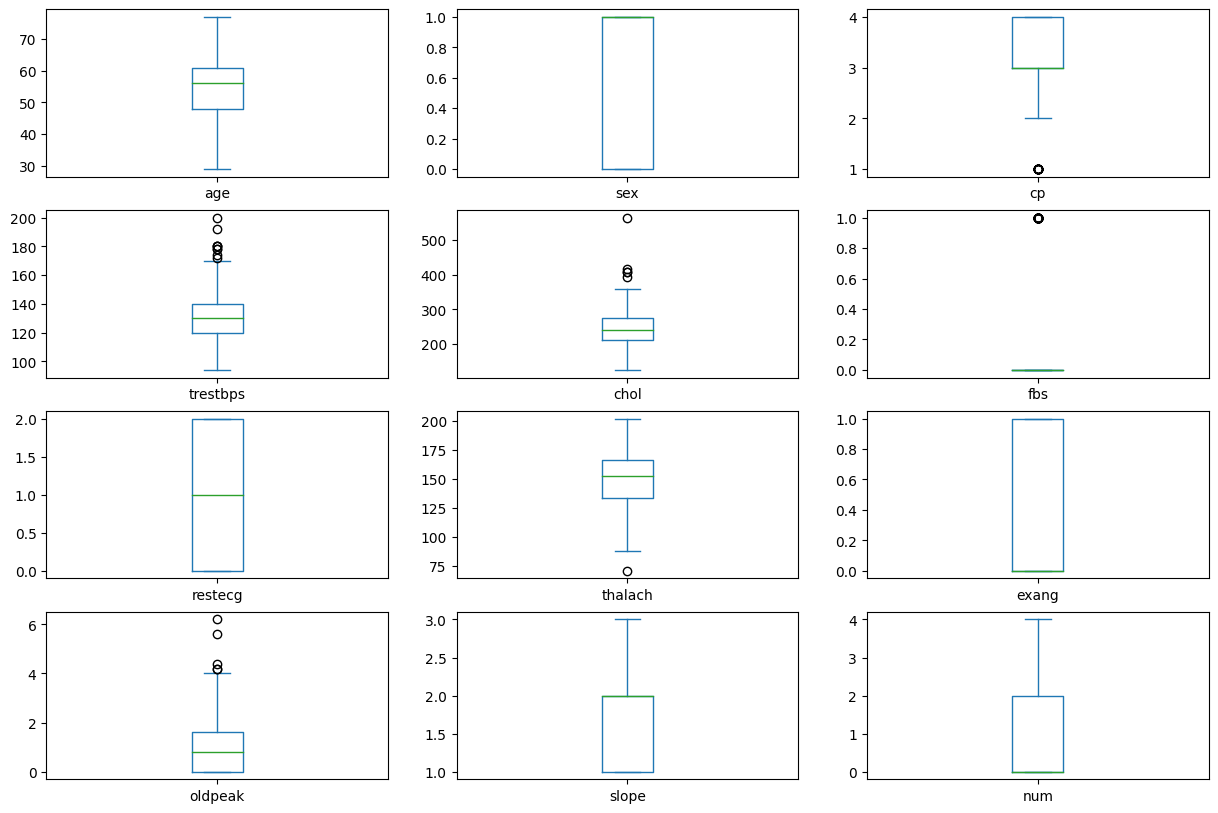

In [67]:
# Visão unimodal do tipo Boxplot
dataset.plot(kind = 'box', subplots = True, layout = (4,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

Observando os gráficos de boxplot, notamos que a distribuição entre os atributos são bastante diferentes uns dos outros. No atributo **chol** podemos perceber pequeno círculo no topo do gráfico, indicando um potencial outlier (valor acima de 500). O mesmo acontece com os atributos **trestbps** e **oldpeak**, onde alguns valores estão cmonsideravelmente distantes da mediana.

Atributos como **sex**, **slope**, **exang**, **cp** e **num** são inconclusivos para este tipo de gráfico devido as suas características de dados categóricos.

Nesta etapa iremos explorar algumas visualizações multimodais, observando como os atributos do dataset se correlacionam. Esta análise é interessante para identificar a correlação entre preditores e entre preditores e um atributo-alvo.

Abaixo será mostrado a matriz de correlação em sua forma gráfica.

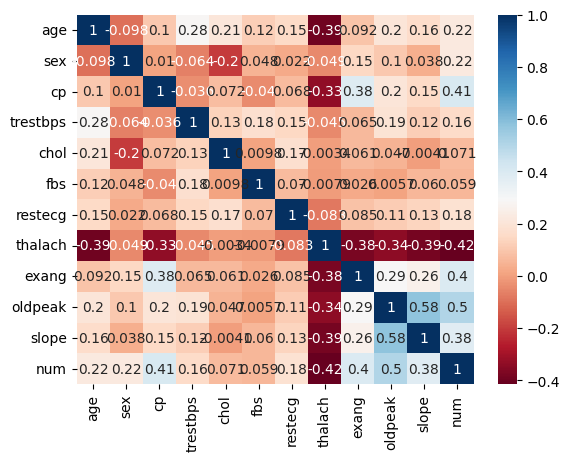

In [69]:
#Visão multimodal da matriz de correlação utilizando Seaborn
sns.heatmap(dataset.corr(), annot=True, cmap='RdBu');

Na visão da matriz de correlação acima, podemos perceber que as variáveis em tons azulados possuem uma correlação positiva (X e Y aumentam), exemplo:
- slope e oldpeak:  0.58
- cp e exang: 0.38

Também podemos observar correlações negativas (X aumenta e Y diminui/vise versa):

- thalach e slope: -0.39
- thalach e oldpeak: -0.34

Abaixo utilizaremos o gráfico de Scatter Plot da biblioteca Seaborn para observar a correlação entre cada um dos atributos.

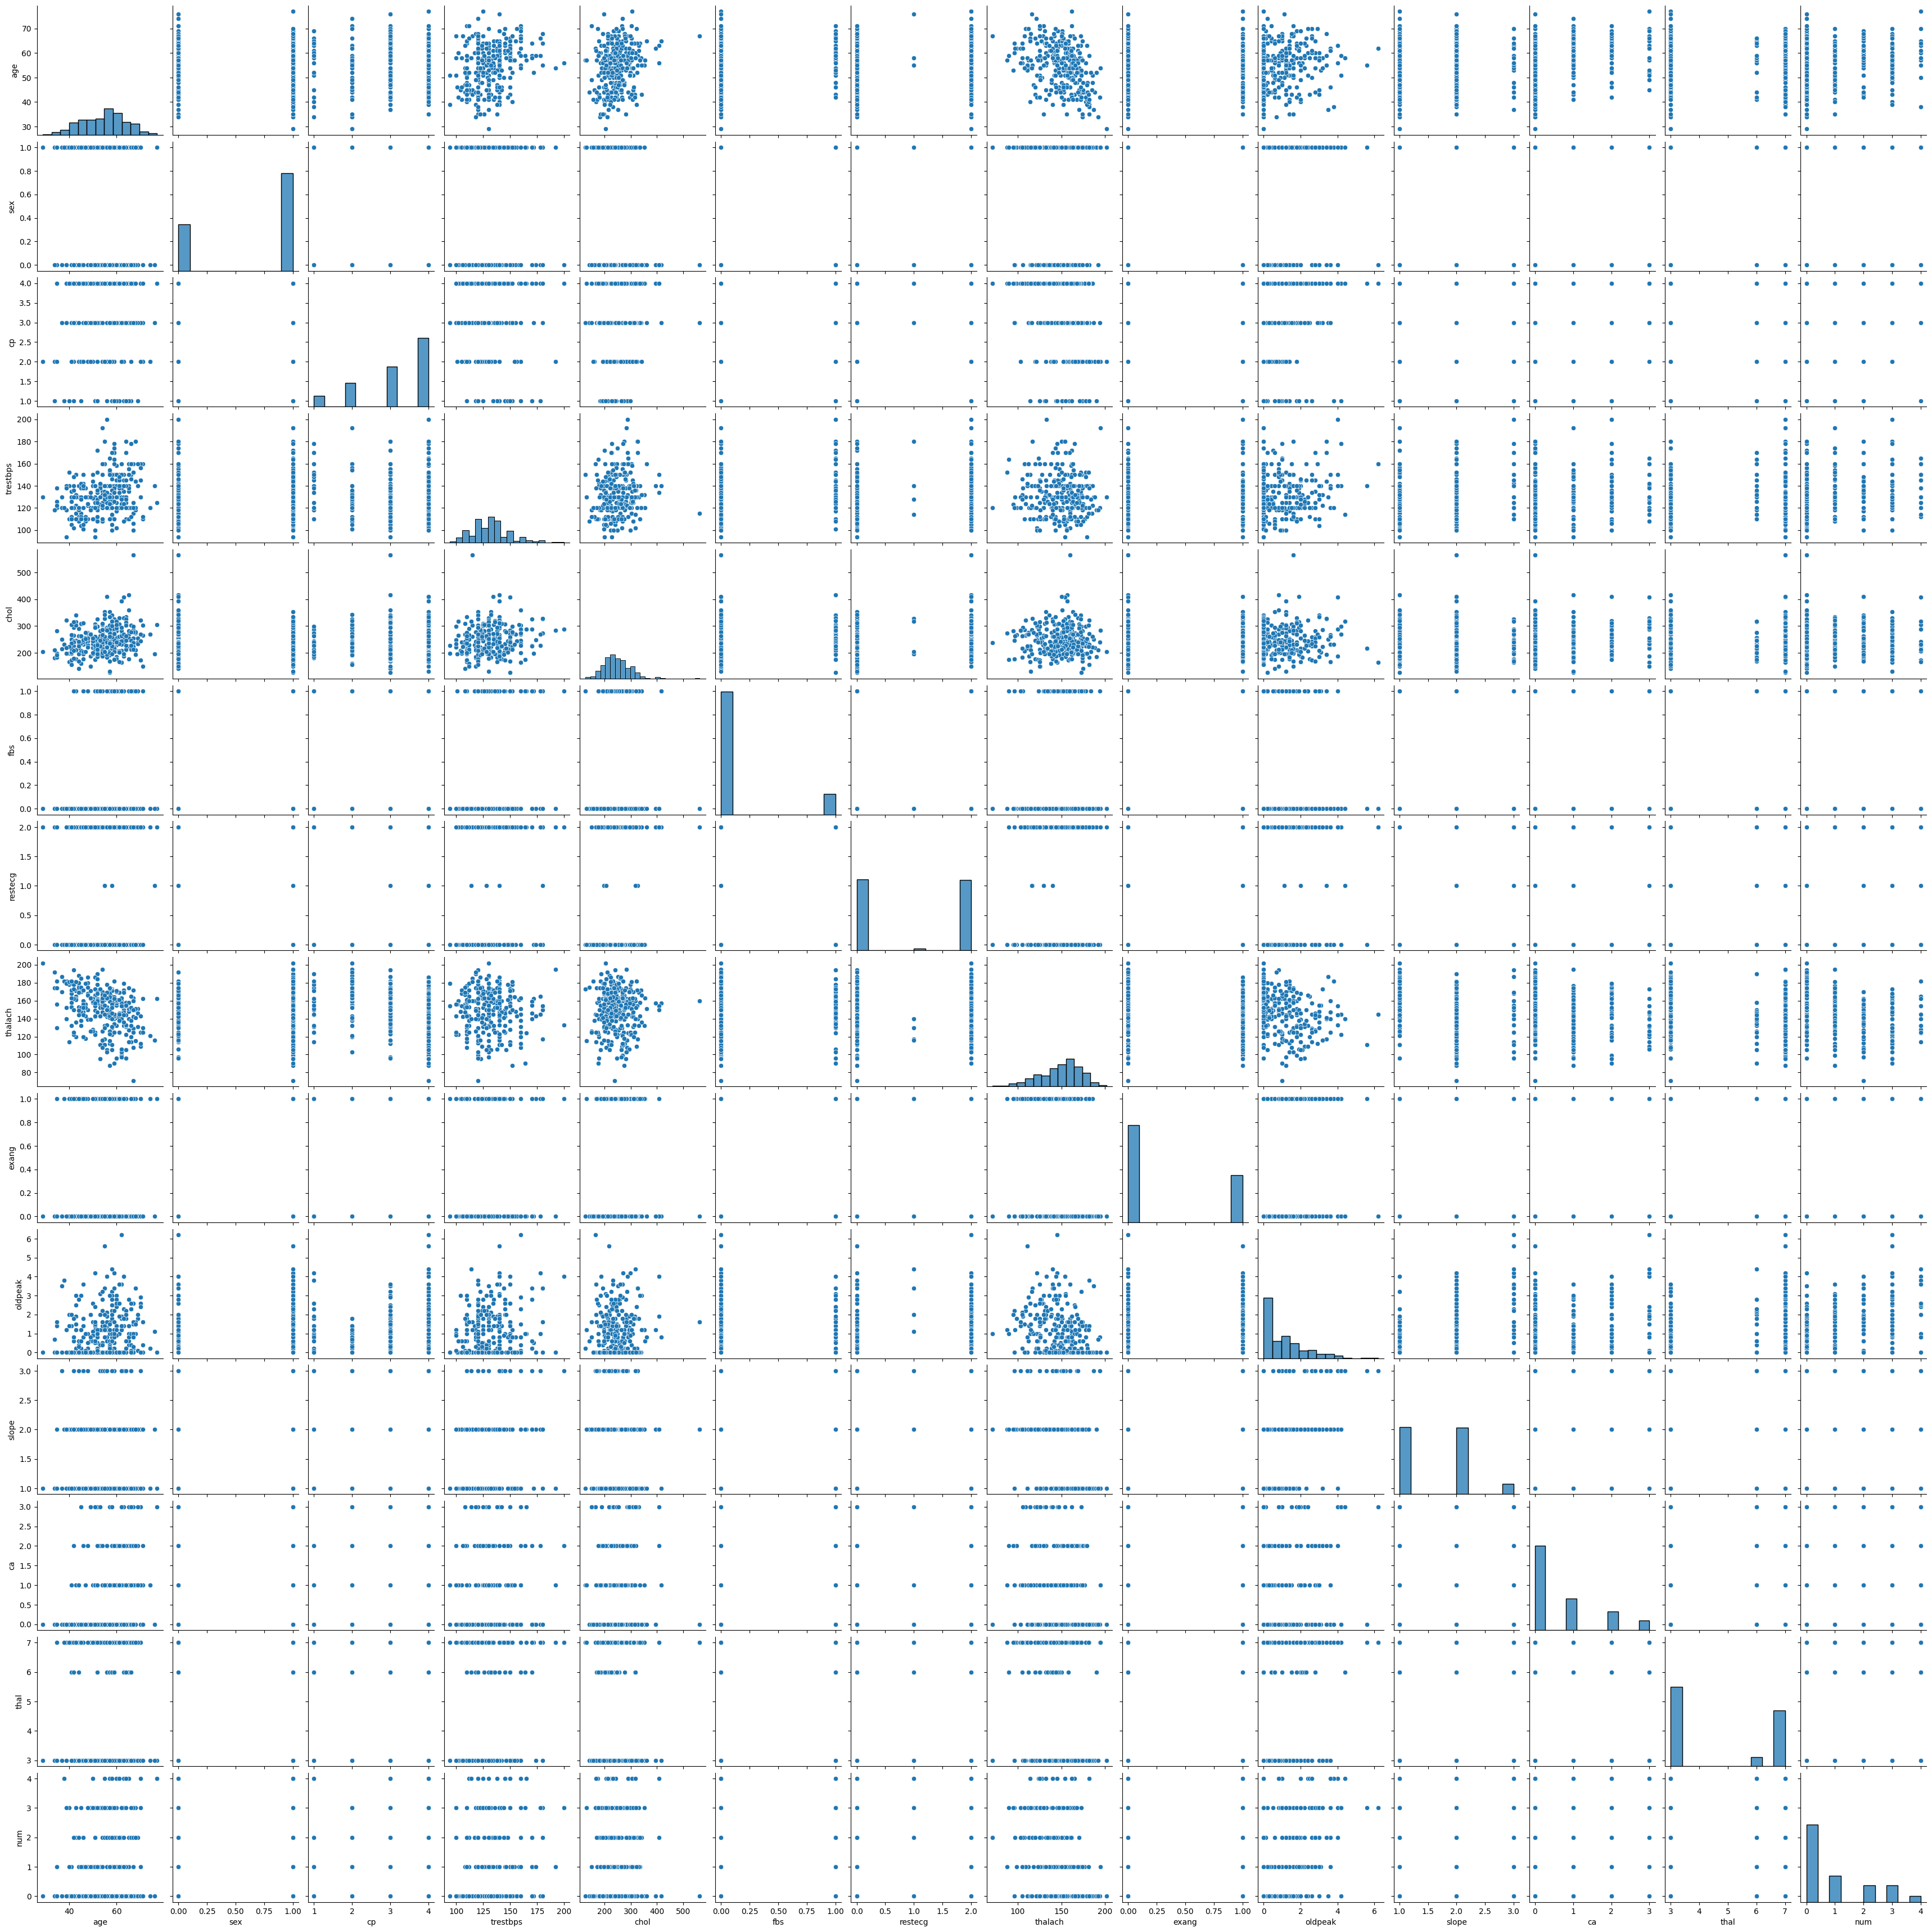

In [70]:
# Visão multimodal do gráfico de dispersão Scatter Plot utilizando a biblioteca Seaborn
sns.pairplot(dataset)

Observando os gráficos acima, podemos perceber que a maior parte dos atributos possuem uma relação neutra ou com características de *overplotting* (quando muitos pontos sobrepoem uns aos outros).

Contudo, ainda é possível observar alguns padrões que remetem a uma relação linear positiva (crescente para a direita):

- chol e age
- age e trestbps

Da mesma, observamos alguns padrões para relação linear negativa (crescente para a esquerda):

- thalach e age

Outra característica que podemosidentificar neste tipo de visualização são as ocorrências de outliers, onde pontos isolados encontram-se muito dispersos de um conjunto. Como nas relações:

- trestbps e chol
- thalach e chol



Abaixo visualizaremos uma variação dos gráficos Scatter plot, utilizando o atributo-alvo (num) como variante de cor.

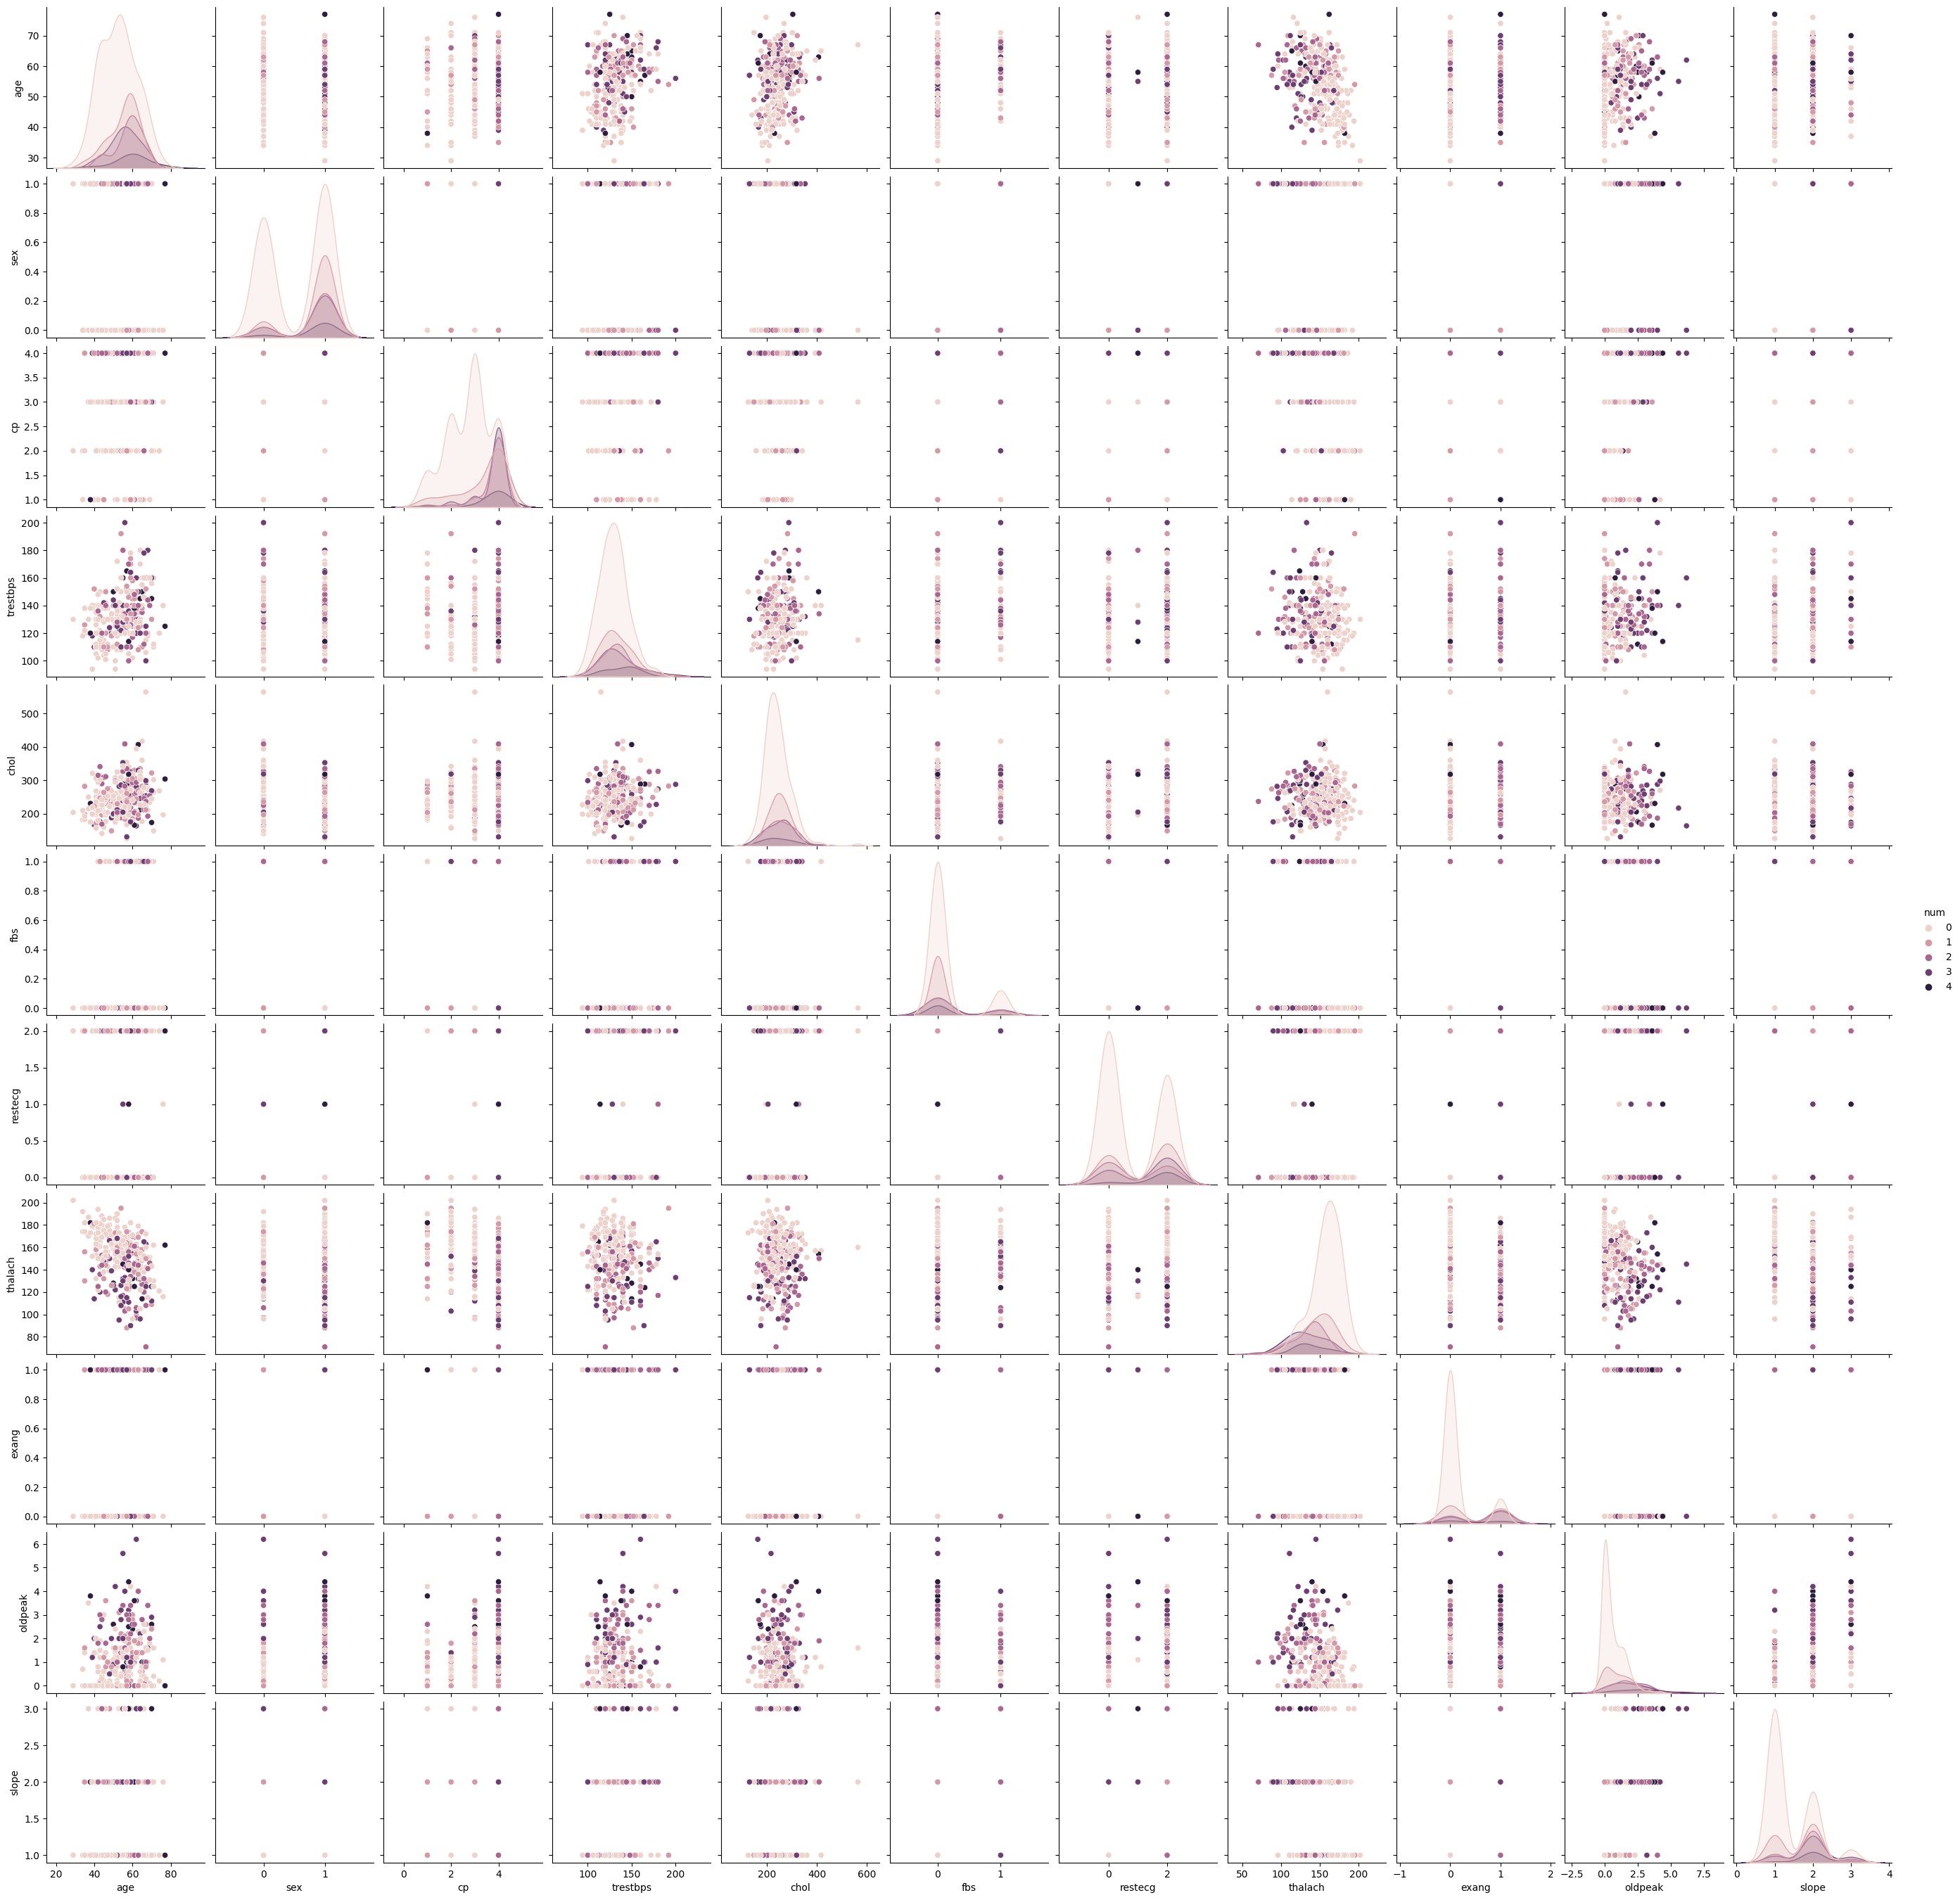

In [71]:
# Variação da visão multimodal do gráfico de dispersão Scatter Plot utilizando a biblioteca Seaborn
sns.pairplot(dataset, hue = "num", height = 2.5);

##Pré-Processamento de Dados

Nesta etapa serão realizadas operações para o tratamento dos dados como o tratamento de missings(valores nulos) e limpeza de valores indesejados.

Anteriormente vimos que o dataset não possui valores nulos, contudo identificamos a ocorrência de dois atributos do tipo *object* (**ca** e **thal**), contendo eventuais caracteres não numéricos. Faremos uma varredura nestes dois atributos para detectar quais caracteres estão presentes.

In [25]:
# Comando para agrupar os dados do atributo "ca" e contar a quantidade de ocorrências de cada valor de forma distinta.
dataset.groupby('ca').size()

ca
0.0    176
1.0     65
2.0     38
3.0     20
?        4
dtype: int64

Podemos notar que o caractere de interrogação aparece quatro vezes.

In [26]:
# Comando para agrupar os dados do atributo "thal" e contar a quantidade de ocorrências de cada valor de forma distinta.
dataset.groupby('thal').size()

thal
3.0    166
6.0     18
7.0    117
?        2
dtype: int64

Aqui também podemos notar a ocorrência de dois caractere de interrogação.

In [32]:
# Cria uma cópia do dataset denominada dataset_v2
dataset_v2 = dataset

# Substitui o caractere de interrogação pelo valor nulo(NaN)
dataset_v2.replace('?', np.nan, inplace=True)

# Realiza a contagem de valores nulos em todos os atributos do dataset_v2
dataset_v2.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

Conforme esperado, os seis caracteres de interrogação foram substituidos por valores nulos nos atributos de **ca** e **thal**.

Abaixo visualizaremos a matriz de valores nulos da biblioteca **missingno** para estimar.

Agora iremos verificar a existência de valores 0 nos demais atributos, tendo em vista que, apesar de não serem valores nulos podem representar "missings".

Sabemos que alguns atributos do dataset possuem o valor 0 como valor categórico do que se deseja demonstrar e são perfeitamente esperados (*vide tabela de atributos e valores possíveis*). Sendo assim, ignoraremos estes atributos nesta etapa e faremos a varredura nos demais: **age**, **trestbps**, **chol**, **thalach** e **oldpeak**.

In [39]:
# Busca a ocorrência do valor 0 no atributo "age"
dataset_v2.loc[dataset_v2['age'] == 0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num


In [40]:
# Busca a ocorrência do valor 0 no atributo "trestbps"
dataset_v2.loc[dataset_v2['trestbps'] == 0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num


In [41]:
# Busca a ocorrência do valor 0 no atributo "chol"
dataset_v2.loc[dataset_v2['chol'] == 0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num


In [42]:
dataset_v2.loc[dataset_v2['thalach'] == 0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num


In [43]:
dataset_v2.loc[dataset_v2['oldpeak'] == 0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
13,44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,0
26,58.0,0.0,3.0,120.0,340.0,0.0,0.0,172.0,0.0,0.0,1.0,0.0,3.0,0
32,64.0,1.0,3.0,140.0,335.0,0.0,0.0,158.0,0.0,0.0,1.0,0.0,3.0,1
35,42.0,1.0,4.0,140.0,226.0,0.0,0.0,178.0,0.0,0.0,1.0,0.0,3.0,0
44,61.0,0.0,4.0,130.0,330.0,0.0,2.0,169.0,0.0,0.0,1.0,0.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0
294,63.0,0.0,4.0,124.0,197.0,0.0,0.0,136.0,1.0,0.0,2.0,0.0,3.0,1
295,41.0,1.0,2.0,120.0,157.0,0.0,0.0,182.0,0.0,0.0,1.0,0.0,3.0,0
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


Observando os resultados das buscas em cada um dos atributos citados, percebemos que apenas o atributo **oldpeak** traz 99 ocorrências do valor 0.

Apesar da existência destes valores e dada a natureza do tipo de exame médico presente neste atributo(*oldpeak: Depressão do segmento ST induzida por exercício em relação ao repouso*), optei por não trata-los como *missing* e preserva-los para enriquecer o modelo.

Sendo assim, prosseguiremos com a observação da matriz de valores nulos da biblioteca **missingno** para visualizar a proporção de valores nulos após a tratativa de substituição dos caracteres de interrogação realizadas anteriormente.

<Axes: >

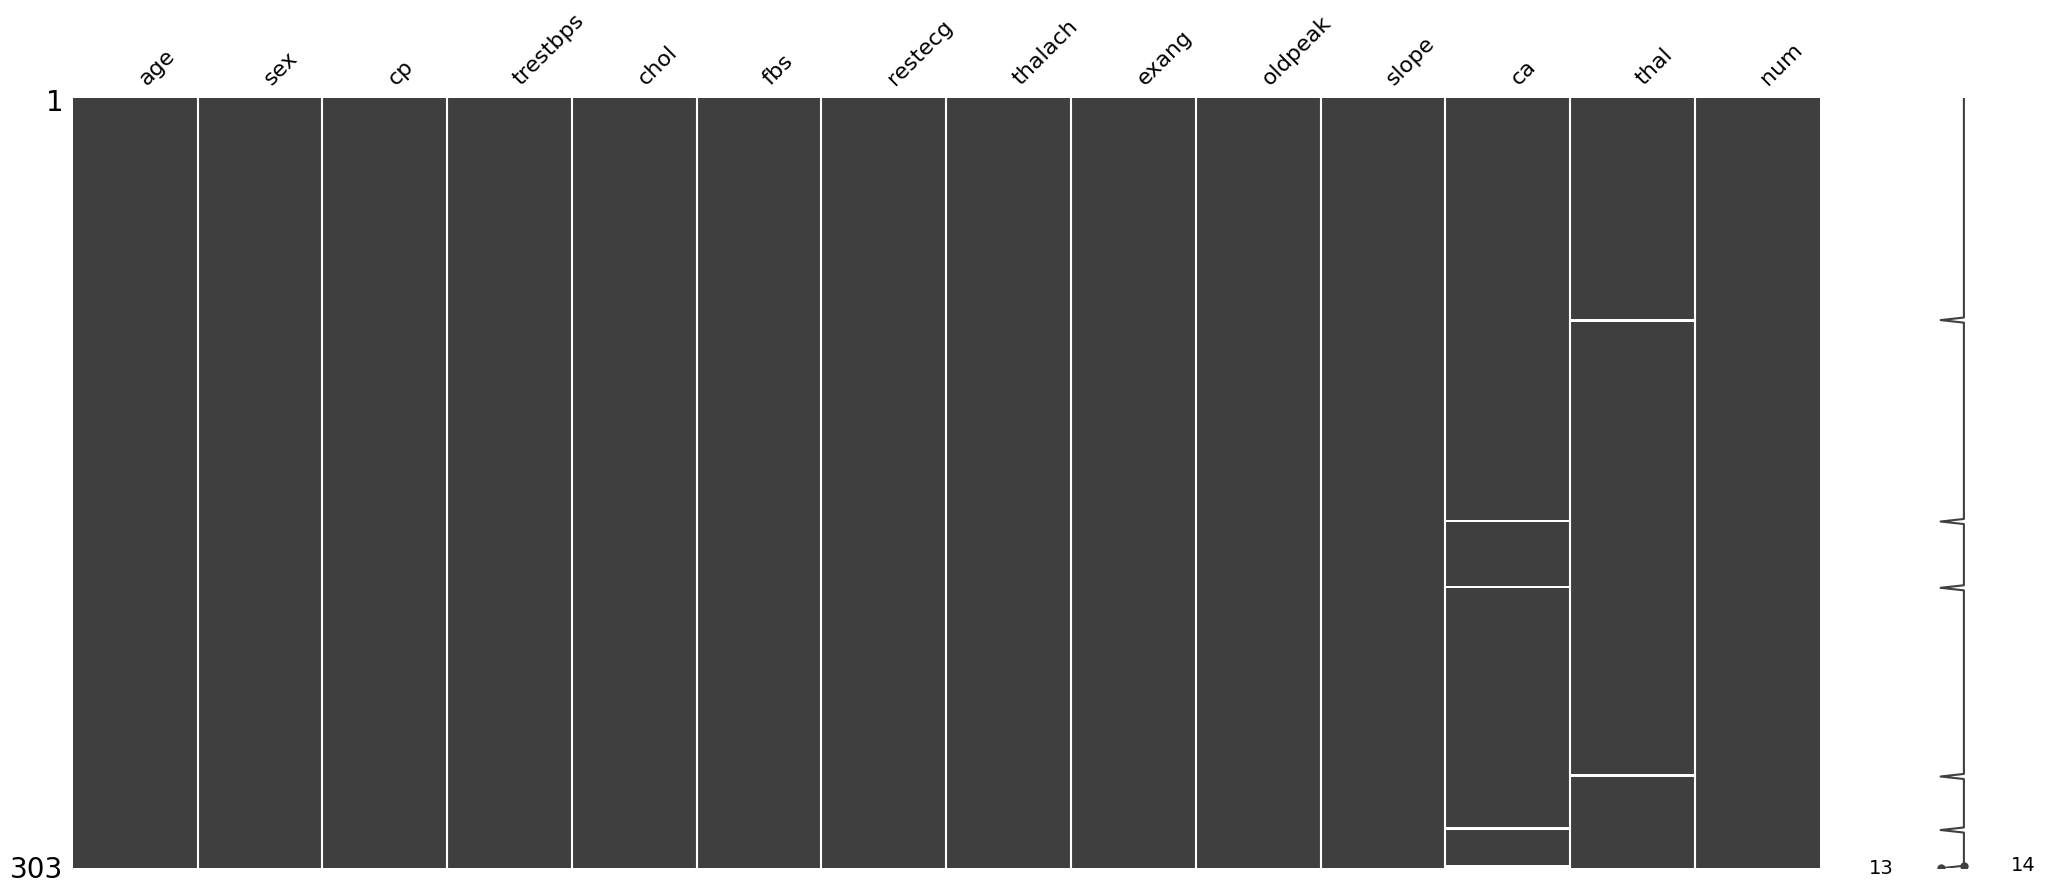

In [44]:
# Exibe matriz de valores nulos
msno.matrix(dataset_v2)

Note que o quantitativo de valores nulos não causa um impacto significante no dataset se removidos, representando 1.98% do total. Sendo assim, serão ignoradas as linhas com valores nulos em uma nova versão do dataset (v3).

<Axes: >

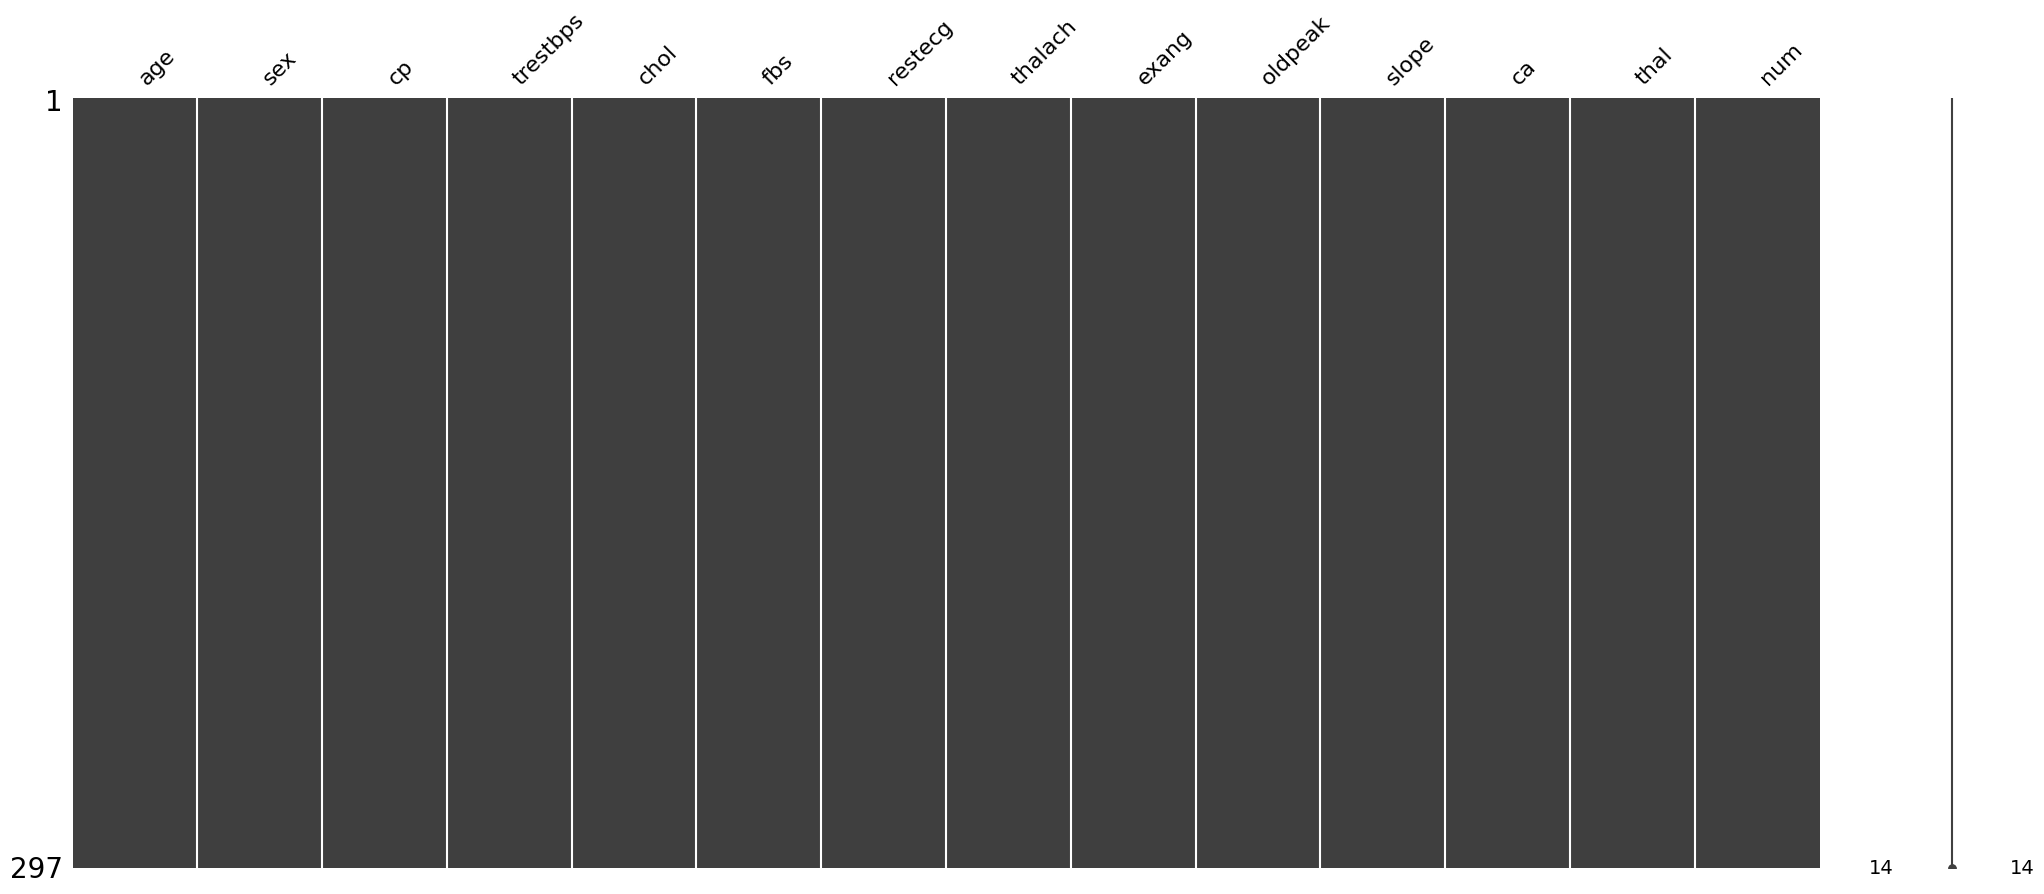

In [46]:
# Grava um novo dataset v3 com dados do dataset_v2, ignorando as linhas com valores nulos
dataset_v3 = dataset_v2.dropna()

# Exibe matriz de valores nulos
msno.matrix(dataset_v3)

Notamos agora que na matriz de valores nulos não existem mais registros nulos, totalizando 297 registros.

Iremos agora criar outra cópia do dataset, onde será feita a conversão das colunas do tipo *object* para *float*, visto que os valores não numéricos foram tratados.

In [57]:
# Cópia do dataset para uma nova versão (v4)
dataset_v4 = dataset_v3

# Converte o atributo "ca" para float
dataset_v4['ca'] = dataset_v3['ca'].astype(float)

# Converte o atributo "thal" para float
dataset_v4['thal'] = dataset_v3['thal'].astype(float)

# Exibe informações de tipo
dataset_v4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  num       297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB


Notamos aqui que a conversão dos atributos ocorreu com sucesso, confirmando que os atributos presentes no dataset possuem apenas valores numéricos.

##Separação em Conjuntos de Treino e Teste

Nesta etapa faremos a separação do dataset sem missings em um *conjunto de validação*(teste) e em um conjunto de treino.

O conjunto de validação é o conjunto de dados que não será utilizado na construção do modelo, porém será utilizado ao final para atestar a qualidade do mesmo.

Utilizaremos a estratégia *train-test-split*, separando 80% do conjunto de dados para a modelagem e o restante (20%) para a validação. Para isso, definimos quais colunas do dataset são atributos e qual coluna é a das classes:

- Atributos = Colunas 1 até 13
- Classes: Coluna 14

In [62]:
# Informa o tamanho de 20% para o conjunto de teste
test_size = 0.20

# Quantidade de execuções aleatórias
seed = 7

# Cópia do dataset para array
array = dataset_v4.values

# Separa os atributos e classes
atributos = array[:,0:13]
classes = array[:,13]

# Define as 4 estruturas de dados
X_train, X_test, y_train, y_test = train_test_split(atributos, classes, test_size=test_size,
                                                    shuffle=True, random_state=seed, stratify=classes)



Ao fim desta etapa teremos 4 estruturas de dados:

- 1 estrutura de dados de atributos para teste;
- 1 estrutura de dados de classes para teste;
- 1 estrutura de dados de atributos para treino;
- 1 estrutura de dados de classes para treino.

## Conclusão

Ao fim deste projeto pude observar que houve uma necessidade baixa de tratamento dos dados (como limpeza dos dados e tratamento de missings), confirmando assim que os dados estavam processados conforme anunciado pelos criadores do repositório. Ainda assim foi detectado a necessidade de alguma transformação.

No que diz respeito à performance, apesar do dataset ser razoavelmente pequeno (303 linhas e 14 colunas), observei que a etapa de visualização multimodal utilizando a Scatter Plot da biblioteca Seaborn exigiu um tempo maior de processamento, diferente das demais visualizações unimodais.

Ao concluir a etapa de pré-processamento de dados, onde foi realizada a conversão dos tipos de atributos textuais para numérico, executei novamente as etapas de Análise de Dados e Visualizações utilizando o dataset sem *missings*, possibilitando utilizar os campos *ca* e *thal* em busca de novos insights. Tal fato não era possível antes da etapa de pré-processamento, uma vez que os atributos eram do tipo *object* e o resumo estatístico e gráficos utilizados admitem apenas valores numéricos.

